# Where to open a new coffee shop?

## 📖 Background
You are helping a client who owns coffee shops in Colorado. The company's coffee shops serve high-quality and responsibly sourced coffee,  pastries, and sandwiches. They operate three locations in Fort Collins and want to expand into Denver. 

Your client believes that the ideal location for a new store is close to affluent households, and the store appeals to the 20-35 year old demographic.
 
Your team collected geographical and demographic information about Denver's neighborhoods to assist the search. They also collected data for Starbucks stores in Denver. Starbucks and the new coffee shops do not compete for the same clients; the team included their location as a reference.

## 💾 The data
You have assembled information from three different sources ([locations](https://github.com/chrismeller/), [neighborhoods](http://data.denvergov.org), [demographics](https://www.census.gov/)):

#### Starbucks locations in Denver, Colorado
- "StoreNumber" - Store Number as assigned by Starbucks
- "Name" - Name identifier for the store
- "PhoneNumber" - Phone number for the store
- "Street 1, 2, and 3" - Address for the store
- "PostalCode" - Zip code of the store
- "Longitude, Latitude" - Coordinates of the store

#### Neighborhoods' geographical information
- "NBHD_ID" - Neighborhood ID (matches the census information)
- "NBHD_NAME" - Name of the statistical neighborhood
- "Geometry" - Polygon that defines the neighborhood

#### Demographic information
- "NBHD_ID" - Neighborhood ID (matches the geographical information)
- "NBHD_NAME' - Nieghborhood name
- "POPULATION_2010' - Population in 2010
- "AGE_ " - Number of people in each age bracket (< 18, 18-34, 35-65, and > 65)
- "NUM_HOUSEHOLDS" - Number of households in the neighborhood
- "FAMILIES" - Number of families in the neighborhood
- "NUM_HHLD_100K+" - Number of households with income above 100 thousand USD per year

_Starbucks locations were scrapped from the Starbucks store locator webpage by [Chris Meller](https://github.com/chrismeller/)._  
_Statistical Neighborhood information from the [City of Denver Open Data Catalog](http://data.denvergov.org), [CC BY 3.0](http://creativecommons.org/licenses/by/3.0/) license._      
_Census information from the [United States Census Bureau](https://www.census.gov/). Publicly available information._

## 💪 Challenge
Provide your client a list of neighborhoods in Denver where they should consider expanding. Include:
* A visualization of Denver's neighborhoods and the Starbucks store locations.
* Find the neighborhoods with the highest proportion of people in the target demographic.
* Select the top three neighborhoods where your client should focus their search.

In [1]:
%%capture
pip install geopandas

In [2]:
# we need this library for geospatial joins
import sys
!{sys.executable} -m pip install rtree

Looking in indexes: https://bin.private.zooplus.net/artifactory/api/pypi/pypi/simple/


In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
denver = pd.read_csv('./data/denver.csv')
denver

,StoreNumber,Name,PhoneNumber,Street1,Street2,Street3,PostalCode,Longitude,Latitude
0,27708-240564,Auraria Tivoli - Student Union,3035563700,900 Auraria Parkway,NaN,NaN,80204,-105.01,39.75
1,75828-94910,Grand Hyatt Denver,303-295-1234,1740 Welton St,NaN,NaN,802023940,-104.99,39.75
2,74105-23807,Safeway - Denver #1463,303-722-6117,2150 S Downing,NaN,NaN,802104528,-104.97,39.68
3,22871-102491,Safeway - Denver #1248,303-477-5091,2660 Federal Blvd,NaN,NaN,80211,-105.02,39.76
4,11105-100844,Highlands Garden Village,303-455-3382,4500 W 38th Ave,NaN,NaN,802122001,-105.05,39.77
...,...,...,...,...,...,...,...,...,...
73,78024-107376,The Curtis Hotel Lobby,720-889-4730,1405 Curtis St,NaN,NaN,802022349,-105.00,39.75
74,2817-86203,Stapleton TC-29th & Quebec,303-322-2477,7304 E. 29th Ave,NaN,NaN,802382699,-104.90,39.76
75,5425-1281,"18th & Franklin - Denver, CO",(303) 320-5518,1600 E 18th Ave,NaN,NaN,802181202,-104.97,39.74
76,9193-151286,"King Soopers-Denver, CO #26",303-758-1210,6470 E Hampden Ave,NaN,NaN,802227605,-104.91,39.65


In [4]:
neighborhoods = gpd.read_file('./data/neighborhoods.shp')
neighborhoods

,NBHD_ID,NBHD_NAME,geometry
0,2,Auraria,"POLYGON ((-105.00042 39.74552, -105.00041 39.7..."
1,21,Cory - Merrill,"POLYGON ((-104.94070 39.69540, -104.94070 39.6..."
2,7,Belcaro,"POLYGON ((-104.94070 39.71156, -104.94069 39.7..."
3,70,Washington Park,"POLYGON ((-104.95931 39.71566, -104.95931 39.7..."
4,71,Washington Park West,"POLYGON ((-104.97342 39.68982, -104.97356 39.6..."
...,...,...,...
73,77,Whittier,"POLYGON ((-104.95977 39.75072, -104.96038 39.7..."
74,18,Cole,"POLYGON ((-104.95975 39.76199, -104.96037 39.7..."
75,76,Westwood,"POLYGON ((-105.03970 39.71125, -105.03849 39.7..."
76,62,Sunnyside,"POLYGON ((-104.99818 39.78256, -104.99820 39.7..."


In [5]:
census = pd.read_csv('./data/census.csv')
census

,NBHD_ID,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,1,Athmar Park,8898.0,2649.0,2406.0,3112.0,731.0,2781.0,1964.0,425.0
1,2,Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
2,3,Baker,4879.0,745.0,1762.0,2037.0,335.0,2447.0,833.0,NaN
3,4,Barnum,6111.0,2015.0,1647.0,2089.0,360.0,1782.0,1289.0,120.0
4,5,Barnum West,5376.0,1579.0,1380.0,1824.0,593.0,1704.0,1207.0,NaN
...,...,...,...,...,...,...,...,...,...,...
73,74,West Colfax,9740.0,2756.0,2935.0,3111.0,938.0,3703.0,1971.0,431.0
74,75,West Highland,8540.0,1304.0,2555.0,3756.0,925.0,4256.0,1853.0,1725.0
75,76,Westwood,15486.0,5678.0,4037.0,4712.0,1059.0,4340.0,3306.0,326.0
76,77,Whittier,4831.0,1119.0,1586.0,1788.0,338.0,1993.0,1008.0,NaN


## Data Exploration

In [6]:
# Merge neighborhood data with census
neighborhood_with_census = pd.merge(neighborhoods[['NBHD_ID','geometry']], census, on='NBHD_ID')
neighborhood_with_census.head()

,NBHD_ID,geometry,NBHD_NAME,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
0,2,"POLYGON ((-105.00042 39.74552, -105.00041 39.7...",Auraria,705.0,7.0,635.0,57.0,6.0,60.0,15.0,NaN
1,21,"POLYGON ((-104.94070 39.69540, -104.94070 39.6...",Cory - Merrill,3892.0,763.0,906.0,1742.0,481.0,1771.0,959.0,NaN
2,7,"POLYGON ((-104.94070 39.71156, -104.94069 39.7...",Belcaro,4172.0,646.0,621.0,1913.0,992.0,2126.0,1162.0,NaN
3,70,"POLYGON ((-104.95931 39.71566, -104.95931 39.7...",Washington Park,6905.0,1199.0,1589.0,3276.0,841.0,3307.0,1695.0,1739.0
4,71,"POLYGON ((-104.97342 39.68982, -104.97356 39.6...",Washington Park West,6393.0,807.0,2365.0,2789.0,432.0,3365.0,1291.0,1457.0


In [7]:
neighborhood_with_census.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   NBHD_ID          78 non-null     int64   
 1   geometry         78 non-null     geometry
 2   NBHD_NAME        78 non-null     object  
 3   POPULATION_2010  78 non-null     float64 
 4   AGE_LESS_18      78 non-null     float64 
 5   AGE_18_TO_34     78 non-null     float64 
 6   AGE_35_TO_65     78 non-null     float64 
 7   AGE_65_PLUS      78 non-null     float64 
 8   NUM_HOUSEHOLDS   78 non-null     float64 
 9   FAMILIES         78 non-null     float64 
 10  NUM_HHLD_100K+   48 non-null     float64 
dtypes: float64(8), geometry(1), int64(1), object(1)
memory usage: 7.3+ KB


In [8]:
neighborhood_with_census.describe(include=['float64'])

,POPULATION_2010,AGE_LESS_18,AGE_18_TO_34,AGE_35_TO_65,AGE_65_PLUS,NUM_HOUSEHOLDS,FAMILIES,NUM_HHLD_100K+
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,48.000000
mean,7694.333333,1650.846154,2375.358974,2871.564103,796.564103,3373.166667,1602.615385,1095.208333
std,5166.830998,1778.296281,1657.967783,1831.507495,617.881773,2145.793889,1183.566251,650.866197
min,705.000000,7.000000,360.000000,57.000000,6.000000,60.000000,15.000000,120.000000
25%,4213.000000,680.750000,1307.250000,1514.000000,404.000000,1773.750000,855.000000,439.250000
50%,6701.500000,1300.000000,1984.000000,2594.000000,665.500000,3086.000000,1290.000000,1043.500000
75%,9640.000000,2150.500000,3090.500000,3667.000000,987.000000,3985.750000,2095.000000,1680.000000
max,30348.000000,11137.000000,8274.000000,10405.000000,3383.000000,10856.000000,7056.000000,2748.000000


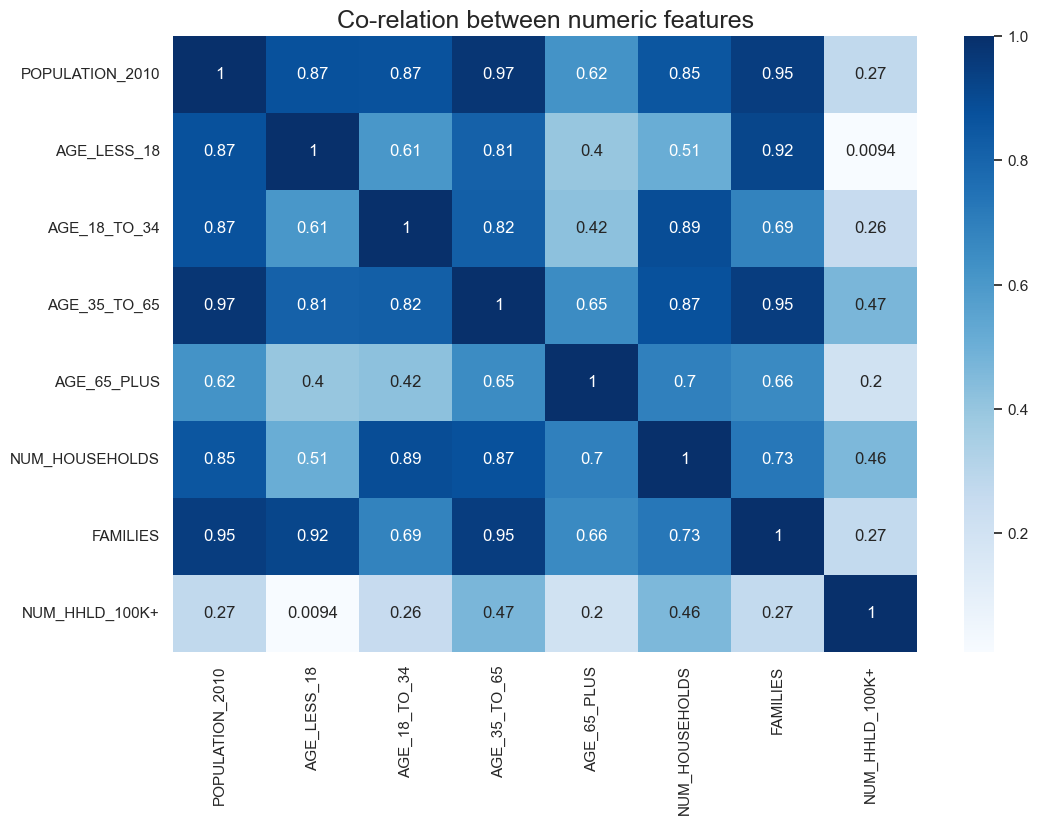

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set() 

plt.figure(figsize=(12,8))

sns.heatmap(neighborhood_with_census.drop('NBHD_ID', axis=1).corr(), cmap='Blues', annot=True)
plt.title('Co-relation between numeric features', fontsize=18)
plt.show()

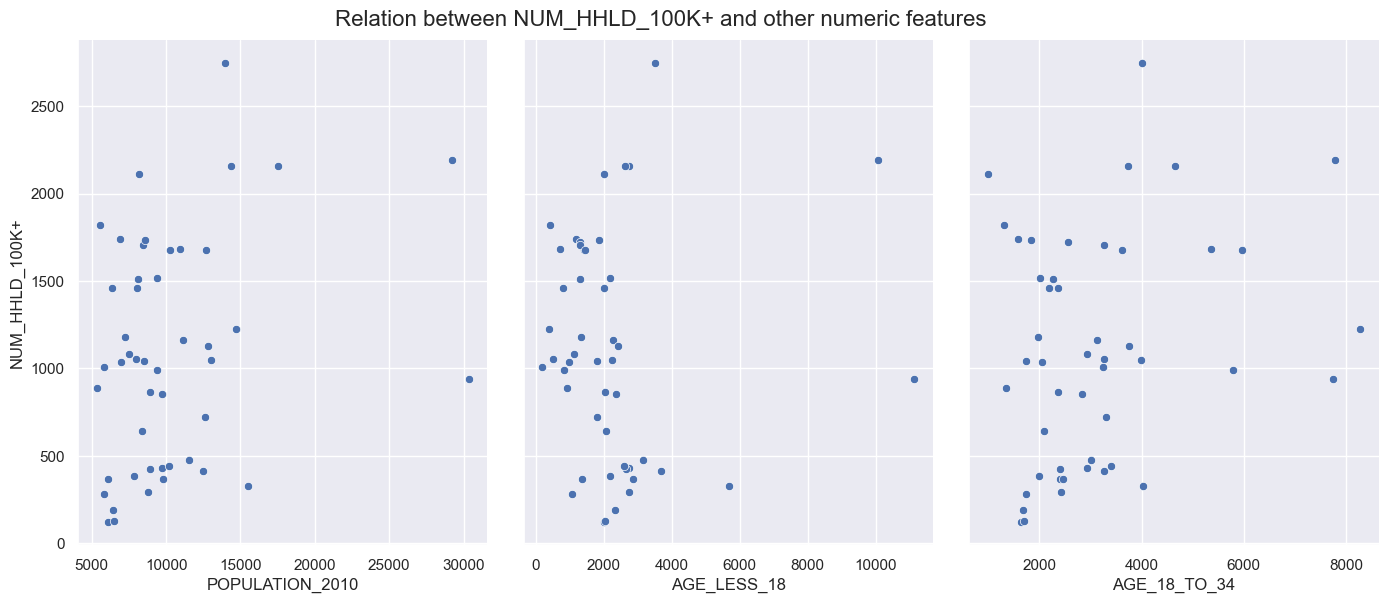

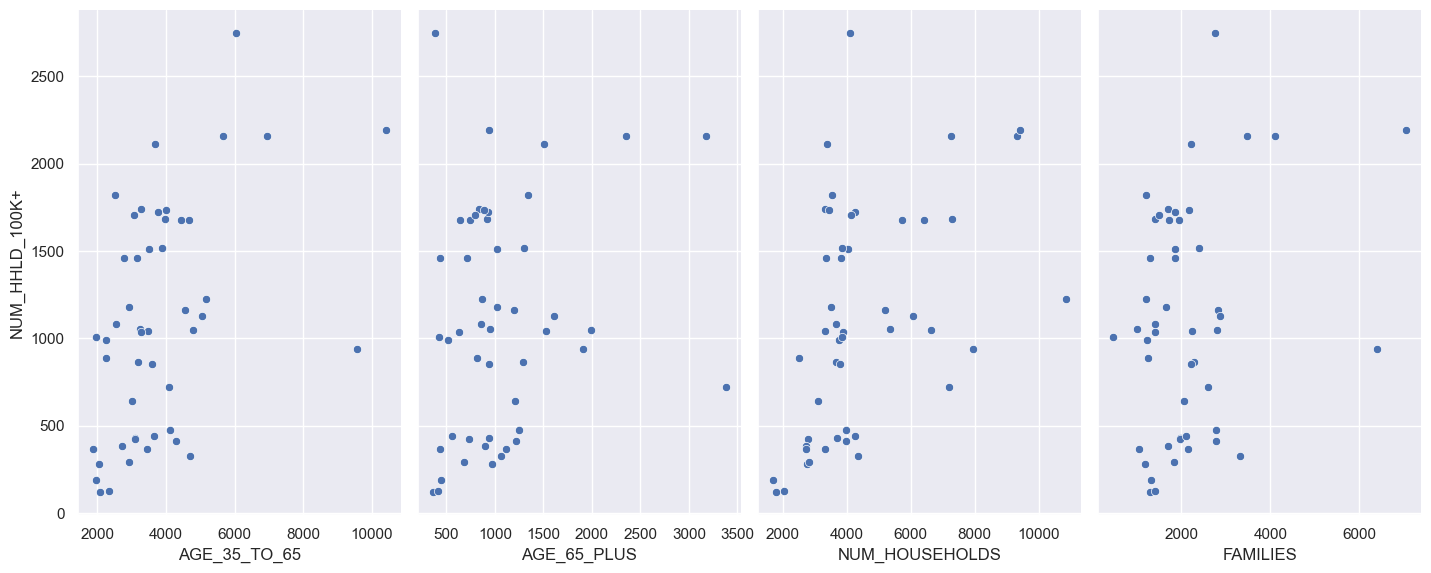

In [10]:
g = sns.pairplot(data=neighborhood_with_census, y_vars=['NUM_HHLD_100K+'], x_vars=['POPULATION_2010','AGE_LESS_18','AGE_18_TO_34'])
g.fig.set_size_inches(15,7)
plt.suptitle('Relation between NUM_HHLD_100K+ and other numeric features', y=1.0, fontsize = 16)
g = sns.pairplot(data=neighborhood_with_census, y_vars=['NUM_HHLD_100K+'], x_vars=['AGE_35_TO_65','AGE_65_PLUS','NUM_HOUSEHOLDS','FAMILIES'])
g.fig.set_size_inches(15,7)
plt.show()

- We see that Affluent households (income over 100K) are not strongly related with any age group or the population in general
- No. of Families on the other hand have strong co-relation between AGE_LESS_18 and AGE_35_65 which suggests most families consists of people between the ages of 35 and 65 and have children (under the age of 18)

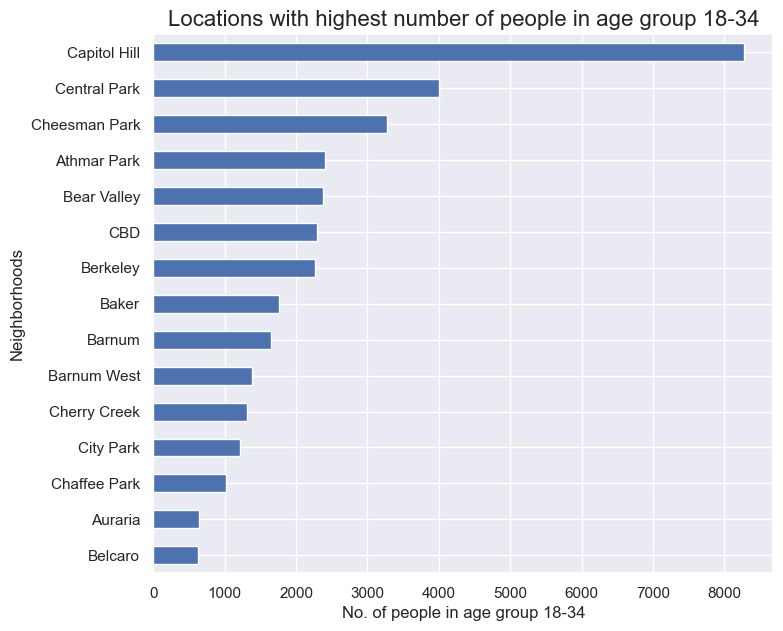

In [11]:
#Where do the people in age group 18-34 mostly live?
plt.figure(figsize=(8,7))
neighborhood_with_census.groupby('NBHD_NAME')['AGE_18_TO_34'].sum()[:15].sort_values().plot(kind='barh')
plt.title('Locations with highest number of people in age group 18-34', fontsize=16)
plt.xlabel('No. of people in age group 18-34')
plt.ylabel('Neighborhoods')
plt.show()

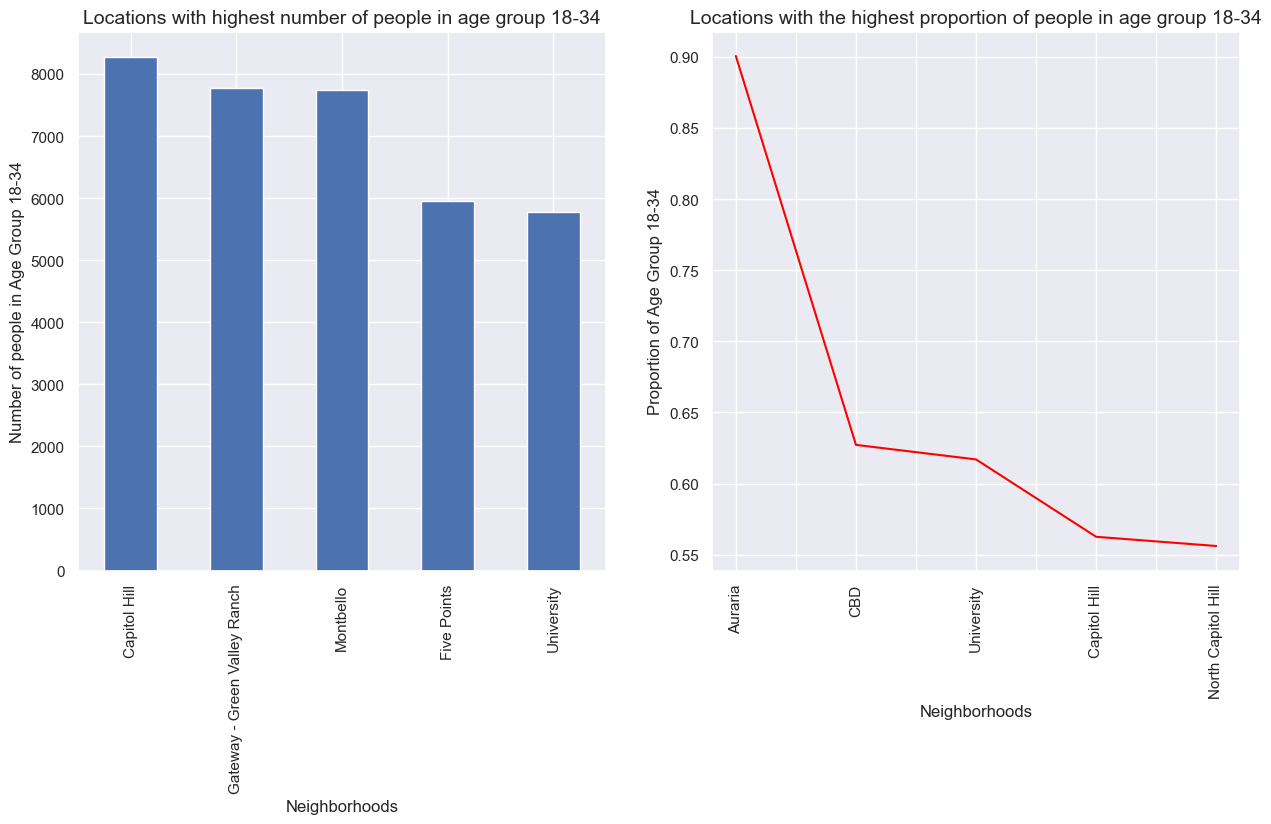

In [12]:
#Proportion v/s total number of people in age group 18-34
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
neighborhood_with_census['prop_18_to_34'] = neighborhood_with_census['AGE_18_TO_34'] / neighborhood_with_census['POPULATION_2010']
top_5_by_number = neighborhood_with_census.groupby('NBHD_NAME')['AGE_18_TO_34'].sum().sort_values(ascending=False)[:5]
top_5_by_number.plot(kind='bar')
plt.title('Locations with highest number of people in age group 18-34', fontsize=14)
plt.ylabel('Number of people in Age Group 18-34')
plt.xlabel('Neighborhoods')

plt.subplot(1,2,2)
top_5_by_prop = neighborhood_with_census.groupby('NBHD_NAME')['prop_18_to_34'].mean().sort_values(ascending=False)[:5]
top_5_by_prop.plot(color='red')
plt.xticks(rotation=90)
plt.title('Locations with the highest proportion of people in age group 18-34', fontsize=14)
plt.ylabel('Proportion of Age Group 18-34')
plt.xlabel('Neighborhoods')
plt.show()

## Creating new features

### Age Group Ranking
Ranking based on the no. of people in the target age group.
We find this using the column 'AGE_18_TO_34'

Why we chose the total no. people instead of the proportion?

As we see in the graphs, high proportion does not mean high number of people.
For the coffee shops, a better choice for location would be a neighborhood with more people in the target age group.

E.g. Although Gateway - Green Valley Ranch has a low proportion of 0.26, it has 10x more people in the age group 18-34 compare to Auraria

In [13]:
neighborhood_with_census.sort_values(by='prop_18_to_34', ascending=False)[:5][['NBHD_NAME','AGE_18_TO_34','prop_18_to_34']]

,NBHD_NAME,AGE_18_TO_34,prop_18_to_34
0,Auraria,635.0,0.900709
48,CBD,2288.0,0.627193
23,University,5784.0,0.616960
45,Capitol Hill,8274.0,0.562551
46,North Capitol Hill,3238.0,0.556071


In [14]:
neighborhood_with_census.sort_values(by='AGE_18_TO_34', ascending=False)[:5][['NBHD_NAME','AGE_18_TO_34','prop_18_to_34']]

,NBHD_NAME,AGE_18_TO_34,prop_18_to_34
45,Capitol Hill,8274.0,0.562551
53,Gateway - Green Valley Ranch,7778.0,0.266361
51,Montbello,7742.0,0.255107
60,Five Points,5961.0,0.468927
23,University,5784.0,0.616960


In [15]:
# top 10 neighborhoods with highest no. of people in the target age group
neighborhood_census = neighborhood_with_census.copy()
neighborhood_census['Age Group Ranking'] = neighborhood_census['AGE_18_TO_34'].rank(ascending=False)
top_target_group = neighborhood_census.nsmallest(10, columns='Age Group Ranking')
top_target_group[['NBHD_NAME','Age Group Ranking']]

,NBHD_NAME,Age Group Ranking
45,Capitol Hill,1.0
53,Gateway - Green Valley Ranch,2.0
51,Montbello,3.0
60,Five Points,4.0
23,University,5.0
5,Speer,6.0
36,Hampden,7.0
75,Westwood,8.0
50,Central Park,9.0
65,Washington Virginia Vale,10.0


### Affluency Ranking
Based on the no. of households with income of more than 100K. Given in the column NUM_HHLD_100K+

In [16]:
neighborhood_census['Affluency Ranking'] = neighborhood_census['NUM_HHLD_100K+'].fillna(0).rank(ascending=False)
most_affluent = neighborhood_census.nsmallest(10, columns='Affluency Ranking')
most_affluent[['NBHD_NAME','Affluency Ranking']]

,NBHD_NAME,Affluency Ranking
50,Central Park,1.0
53,Gateway - Green Valley Ranch,2.0
36,Hampden,3.0
38,Hampden South,4.0
26,Hilltop,5.0
6,Cherry Creek,6.0
3,Washington Park,7.0
30,South Park Hill,8.0
15,West Highland,9.0
20,Highland,10.0


### Neighborhoods without a Starbucks
It might help to know if a neighborhood has a Starbucks

In [17]:
# Neighborhoods without a Starbucks
starbucks = gpd.GeoDataFrame(
    denver, geometry=gpd.points_from_xy(denver.Longitude, denver.Latitude))
areas_and_starbucks = gpd.sjoin(neighborhoods, starbucks, how='left')
areawise_starbucks_count = areas_and_starbucks.groupby('NBHD_NAME')['StoreNumber'].count()
areas_without_starbucks = areawise_starbucks_count[areawise_starbucks_count == 0].index.values
without_starbucks = areas_and_starbucks[areas_and_starbucks['NBHD_NAME'].isin(areas_without_starbucks)]
neighborhood_census['Has Starbucks?'] = neighborhood_census.apply(lambda x :'No' if x['NBHD_NAME'] in areas_without_starbucks else 'Yes', axis=1)
neighborhood_census[neighborhood_census['Has Starbucks?'] == 'No'][['NBHD_ID','NBHD_NAME','Has Starbucks?']].head()

,NBHD_ID,NBHD_NAME,Has Starbucks?
1,21,Cory - Merrill,No
2,7,Belcaro,No
4,71,Washington Park West,No
5,59,Speer,No
9,14,City Park,No


## Visualizing the neighborhoods of Denver

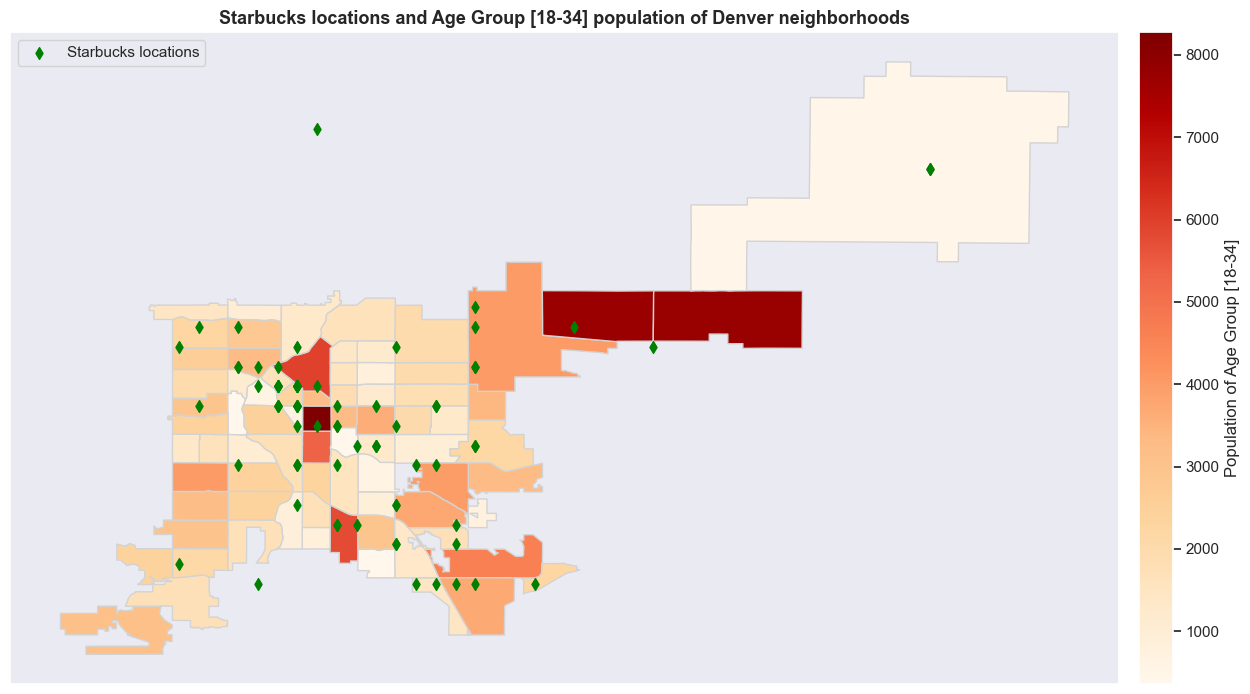

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.offsetbox import TextArea, AnnotationBbox

def visualize_denver():
    fig, ax = plt.subplots(figsize=(15,15))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="3%", pad=0.2)
    neighborhood_census.plot(column='AGE_18_TO_34', 
                             cmap='OrRd', 
                             edgecolor="lightgray",
                             legend=True, ax=ax, cax=cax)
    cax.set_ylabel('Population of Age Group [18-34]', rotation=90)
    starbucks['geometry'].plot(color='green', marker='d', label='Starbucks locations', ax=ax)
    return ax

ax = visualize_denver()

ax.title.set_text('Starbucks locations and Age Group [18-34] population of Denver neighborhoods')

ax.title.set_size('13')
ax.title.set_fontweight('bold')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc='upper left')
plt.show()

## Recommendations for the new locations

For our final recommendation of location, we create a new feature called 'Combined Ranking' which is the average for Affluency and Age Group Ranking.
Here we assume, both Affluency and Age Group has equal importance in the decision on where to open the new coffee shops.

The best locations are then the top 3 neigborhoods with the highest Combined Ranking

In [19]:
neighborhood_census['Combined Ranking'] = (neighborhood_census['Affluency Ranking'] + neighborhood_census['Age Group Ranking']) / 2
recommended_locations = neighborhood_census.sort_values(by='Combined Ranking').head(3)

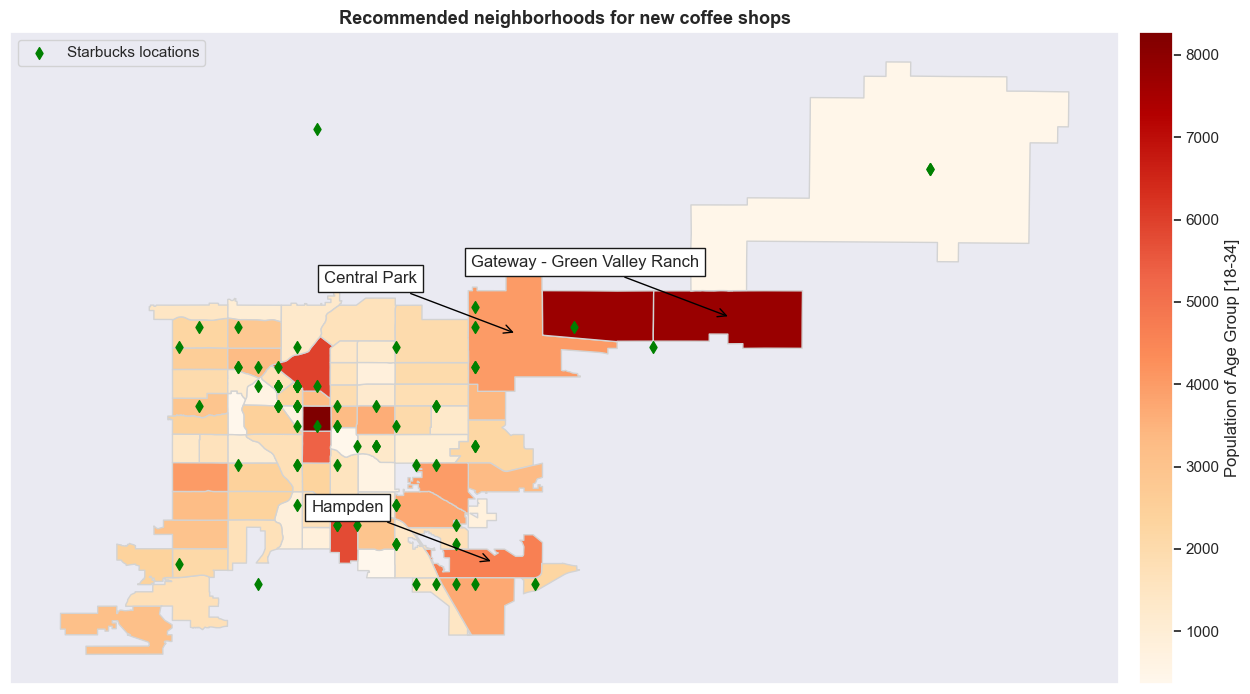

In [20]:
ax = visualize_denver()
for index, location in recommended_locations.iterrows():
    text = '''{0}'''.format(location['NBHD_NAME'])
    offsetbox = TextArea(text)
    xy = (location.geometry.centroid.x, location.geometry.centroid.y)
    ab = AnnotationBbox(offsetbox, xy,
                        xybox=xy,
                        xycoords='data',
                        boxcoords='offset points',
                        arrowprops=dict(arrowstyle="->", color='black'))
    ax.add_artist(ab)
    
ax.title.set_text('Recommended neighborhoods for new coffee shops')

ax.title.set_size('13')
ax.title.set_fontweight('bold')
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc='upper left')
plt.show()    

In [21]:
recommended_locations[['NBHD_ID','NBHD_NAME','Affluency Ranking','Age Group Ranking','Combined Ranking','Has Starbucks?']]

,NBHD_ID,NBHD_NAME,Affluency Ranking,Age Group Ranking,Combined Ranking,Has Starbucks?
53,28,Gateway - Green Valley Ranch,2.0,2.0,2.0,No
50,60,Central Park,1.0,9.0,5.0,Yes
36,32,Hampden,3.0,7.0,5.0,No
